In [25]:
import requests

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import time
import datetime

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from scipy.stats import bernoulli

import numpy as np
from scipy import stats

## Introduction

Our project will address two research questions: 

1) What is the causal impact of PM 2.5 and Ozone level on the crude prevalence of asthma? 

2) Given the selected features, redict the crude prevalence and crude mortality rate of asthma in the future using generalized linear model.

We will mainly be using three datasets: 

1) Annual State-Level U.S. Chronic Disease Indicators filtered for asthma 

2) Modified PM2.5 dataset 

3) Modified ozone dataset 

(We computed the daily mean PM2.5 and ozone level for each state due to the large size of the two datasets)

In [26]:
asthma = pd.read_csv('Asthma.csv')
asthma.head(5)

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.



,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2012,2012,AL,Alabama,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,1,AST,AST4_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
1,2014,2014,AL,Alabama,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,1,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
2,2011,2011,AZ,Arizona,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,4,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
3,2015,2015,CT,Connecticut,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,9,AST,AST4_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2011,2011,FL,Florida,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,12,AST,AST4_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN


In [27]:
pm25 = pd.read_csv('PM25.csv').drop('Unnamed: 0', axis = 1)
pm25.head(5)

,statefip,01JAN2011,02JAN2011,03JAN2011,04JAN2011,05JAN2011,06JAN2011,07JAN2011,08JAN2011,09JAN2011,...,22DEC2014,23DEC2014,24DEC2014,25DEC2014,26DEC2014,27DEC2014,28DEC2014,29DEC2014,30DEC2014,31DEC2014
0,1,5.196290,4.984104,7.209600,14.935756,13.690596,8.585039,5.775294,5.281323,5.653868,...,6.277790,4.574800,4.386800,6.835787,10.125804,8.777215,5.365212,6.648250,8.164014,10.379025
1,4,8.827295,7.360635,12.533566,11.775343,10.416504,10.179782,13.626992,9.685872,11.871241,...,15.854941,9.668950,9.149272,8.300927,7.769705,12.176465,11.554488,14.450957,10.587868,9.241211
2,5,5.786716,7.738383,8.606869,11.491568,12.038085,8.903985,5.570338,4.409569,5.063505,...,9.685457,5.797382,5.141571,4.235675,7.013927,5.985645,6.463000,8.268514,10.546440,9.648933
3,6,13.559603,8.105638,7.545573,9.488456,10.519056,12.612504,19.867717,16.772288,14.125612,...,11.942154,7.795916,8.594198,5.446916,5.797357,11.192144,14.167456,14.964028,10.647488,11.708086
4,8,3.949587,5.036296,8.523260,14.477241,4.653650,7.191430,7.362693,14.661273,7.734357,...,3.371333,4.931956,6.957509,3.884519,5.561388,8.712206,13.681786,10.666739,7.372589,13.418500


In [28]:
ozone = pd.read_csv('ozone.csv').drop('Unnamed: 0', axis = 1)
ozone.head(5)

,statefip,01JAN2011,02JAN2011,03JAN2011,04JAN2011,05JAN2011,06JAN2011,07JAN2011,08JAN2011,09JAN2011,...,22DEC2014,23DEC2014,24DEC2014,25DEC2014,26DEC2014,27DEC2014,28DEC2014,29DEC2014,30DEC2014,31DEC2014
0,1,32.721949,34.568758,30.375864,34.251780,25.669446,35.428277,42.567707,37.360915,29.332703,...,18.379176,26.374789,27.970030,24.502318,29.265682,26.539294,21.010491,13.935375,20.869850,20.861829
1,4,37.600710,36.208419,28.965546,22.845798,24.252316,21.691751,27.932608,32.126367,38.859366,...,30.941900,41.052629,35.428706,35.638700,33.114273,29.577865,30.148626,30.046606,31.062371,30.077946
2,5,30.239673,34.037387,34.557988,31.986139,33.764155,39.655212,35.805370,34.693654,27.113124,...,18.632721,26.653000,16.930287,33.680957,24.719975,19.922840,15.101408,20.903627,25.459039,23.421275
3,6,32.563569,28.175180,23.692732,24.940009,20.267972,19.010336,16.436324,22.489915,28.328533,...,19.186271,19.241213,30.206364,36.871303,32.910782,30.952254,29.631145,29.022493,33.305325,32.842572
4,8,37.797404,36.801446,36.713041,41.866961,42.656211,38.958352,33.559118,23.684557,37.000746,...,35.381818,39.690000,28.191967,33.211362,29.620425,31.601164,28.668236,28.348465,26.475895,29.747821


## Data Cleaning

For data cleaning, we first loaded individual datasets and dropped those containing N/A values. We selected columns relevant to our reasearch question, and merged all 3 datasets into one on Year and StateID.\
Since we dropped various rows containing N/A values, the data used to generate models as well as make predictions may not be as accurate. 

### 1) Asthma Dataset

In [29]:
asthma['Question'].value_counts()

Asthma mortality rate                                                                      9816
Current asthma prevalence among adults aged >= 18 years                                    7830
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma       7830
Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma       7830
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma    7830
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma    7830
Hospitalizations for asthma                                                                6516
Emergency department visit rate for asthma                                                 6312
Asthma prevalence among women aged 18-44 years                                             2925
Name: Question, dtype: int64

Among the 9 questions addressed in the asthma dataset, we will only explore 'asthma mortality rate' and 'current asthma prevalence among adults aged >= 18 years' for our project. And we will only use data that are between 2011-2014 to match the time frame in PM2.5 and ozone datasets. Moreoover, we will only use crude rate and crude prevalence in our analysis.

#### Asthma mortality rate (crude rate)

In [30]:
mortality = asthma[asthma['Question'] == 'Asthma mortality rate']
# Select data from 2011-2014
mortality = mortality[(mortality['YearStart'] >= 2011) & (mortality['YearEnd'] <= 2014) & (mortality['DataValueTypeID'] == 'CRDRATE')]
selected_columns = ['YearStart', 'LocationDesc', 'LocationID', 'DataValue', 'StratificationCategoryID1', 'StratificationID1']
mortality_selected = mortality[selected_columns]
mortality_selected = mortality_selected.rename(columns={'YearStart':'Year','LocationDesc':'State', 'LocationID': 'StateID',
                                                'DataValue':'Cases_per_million', 'StratificationCategoryID1':'StratificationCategory',
                                                'StratificationID1':'Stratification'})
# Drop NA rows
mortality_cleaned = mortality_selected.dropna()
mortality_cleaned.head(5)


,Year,State,StateID,Cases_per_million,StratificationCategory,Stratification
49,2013,Florida,12,9.0,RACE,WHT
51,2013,Illinois,17,17.1,GENDER,GENF
74,2013,Alabama,1,8.7,OVERALL,OVR
83,2011,Colorado,8,8.2,OVERALL,OVR
126,2011,Colorado,8,9.4,RACE,WHT


#### Current asthma prevalence among adults aged >= 18 years (crude rate)

In [31]:
prevalence = asthma[asthma['Question'] == 'Current asthma prevalence among adults aged >= 18 years']
# Select data from 2011-2014
prevalence = prevalence[(prevalence['YearStart'] >= 2011) & (prevalence['YearEnd'] <= 2014) & (prevalence['DataValueTypeID'] == 'CRDPREV')]
prevalence_selected = prevalence[selected_columns]
prevalence_selected = prevalence_selected. rename(columns={'YearStart':'Year','LocationDesc':'State', 'LocationID': 'StateID',
                                                'DataValue':'Prevalence', 'StratificationCategoryID1':'StratificationCategory',
                                                'StratificationID1':'Stratification'})
# Drop NA rows
prevalence_cleaned = prevalence_selected.dropna()
prevalence_cleaned.head(5)

,Year,State,StateID,Prevalence,StratificationCategory,Stratification
22650,2012,Colorado,8,7.1,GENDER,GENM
22658,2011,Puerto Rico,72,13.2,GENDER,GENF
22659,2014,New Mexico,35,7.4,GENDER,GENM
22662,2011,Missouri,29,11.5,GENDER,GENF
22663,2011,Montana,30,11.6,GENDER,GENF


### 2) PM2.5 & Ozone

In [32]:
pm25_cleaned = pm25.melt(id_vars='statefip')
pm25_cleaned = pm25_cleaned.rename(columns={'statefip':'StateID','variable':'Date', 'value': 'PM2.5'})
# Add a year column
pm25_cleaned['Year'] = pm25_cleaned['Date'].str[-4:]
# Group PM2.5 by year and take the mean
pm25_grouped = pm25_cleaned.groupby(["Year", "StateID"]).mean().reset_index()
pm25_grouped.head(5)

,Year,StateID,PM2.5
0,2011,1,10.722394
1,2011,4,7.957158
2,2011,5,10.607418
3,2011,6,10.424960
4,2011,8,6.438329


In [33]:
ozone_cleaned = ozone.melt(id_vars='statefip')
ozone_cleaned = ozone_cleaned.rename(columns={'statefip':'StateID','variable':'Date', 'value': 'Ozone'})
# Add a year column
ozone_cleaned['Year'] = ozone_cleaned['Date'].str[-4:]
# Group ozone level by year and take the mean
ozone_grouped = ozone_cleaned.groupby(["Year", "StateID"]).mean().reset_index()
ozone_grouped.head(5)

,Year,StateID,Ozone
0,2011,1,41.170865
1,2011,4,46.998399
2,2011,5,41.012629
3,2011,6,39.981360
4,2011,8,47.043940


In [34]:
# Merge pm25_grouped with ozone_grouped
pm25_ozone = pd.merge(pm25_grouped, ozone_grouped, how='left', on=['Year','StateID'])
pm25_ozone.head(5)

,Year,StateID,PM2.5,Ozone
0,2011,1,10.722394,41.170865
1,2011,4,7.957158,46.998399
2,2011,5,10.607418,41.012629
3,2011,6,10.424960,39.981360
4,2011,8,6.438329,47.043940


### 3) Merge asthma, PM2.5 and ozone datasets together

In [35]:
# Convert 'Year' column in pm25_ozone to float
pm25_ozone['Year'] = pm25_ozone['Year'].apply(lambda x: float(x))
mortality_airquality = pd.merge(mortality_cleaned, pm25_ozone, how='left', on=['Year','StateID'], )
# Drop NA rows
mortality_final = mortality_airquality.dropna()
mortality_final.head(5)

,Year,State,StateID,Cases_per_million,StratificationCategory,Stratification,PM2.5,Ozone
0,2013,Florida,12,9.0,RACE,WHT,6.742281,36.211734
1,2013,Illinois,17,17.1,GENDER,GENF,10.812928,35.851500
2,2013,Alabama,1,8.7,OVERALL,OVR,9.992244,36.892838
3,2011,Colorado,8,8.2,OVERALL,OVR,6.438329,47.043940
4,2011,Colorado,8,9.4,RACE,WHT,6.438329,47.043940


In [36]:
prevalence_airquality = pd.merge(prevalence_cleaned, pm25_ozone, how='left', on=['Year','StateID'])
# Drop NA rows
prevalence_final = prevalence_airquality.dropna()
prevalence_final.head(5)

,Year,State,StateID,Prevalence,StratificationCategory,Stratification,PM2.5,Ozone
0,2012,Colorado,8,7.1,GENDER,GENM,6.906790,47.597103
2,2014,New Mexico,35,7.4,GENDER,GENM,6.728881,43.070311
3,2011,Missouri,29,11.5,GENDER,GENF,10.122351,40.398751
4,2011,Montana,30,11.6,GENDER,GENF,6.424145,39.542425
5,2012,Kentucky,21,8.4,GENDER,GENM,9.935710,42.056297


## Looking at the difference of Prevalence/PM2.5/Ozone between 2011 and 2014

In [37]:
prevalence_2011 = prevalence_final[prevalence_final['Year'] == 2011]
prevalence_2014 = prevalence_final[prevalence_final['Year'] == 2014]
prevalence_2014[prevalence_2014['State'] == 'Missouri']

,Year,State,StateID,Prevalence,StratificationCategory,Stratification,PM2.5,Ozone
368,2014,Missouri,29,12.5,RACE,MRC,9.425226,37.530147
491,2014,Missouri,29,9.5,RACE,WHT,9.425226,37.530147
692,2014,Missouri,29,12.0,GENDER,GENF,9.425226,37.530147
804,2014,Missouri,29,11.0,RACE,BLK,9.425226,37.530147
908,2014,Missouri,29,7.3,GENDER,GENM,9.425226,37.530147
1348,2014,Missouri,29,9.7,OVERALL,OVR,9.425226,37.530147


In [38]:
#prevalence_2011 = prevalence_2011.rename(columns={'PM2.5':'PM2.5_2011','Ozone':'Ozone_2011'})
#prevalence_2011[prevalence_2011['State'] == 'Missouri']

In [39]:
prevalence_2011_2014 = pd.merge(prevalence_2011, prevalence_2014, how='left', on=['State','StateID', 'StratificationCategory', 
                                                                                  'Stratification'])
prevalence_2011_2014[prevalence_2011_2014['State'] == 'Alabama']

,Year_x,State,StateID,Prevalence_x,StratificationCategory,Stratification,PM2.5_x,Ozone_x,Year_y,Prevalence_y,PM2.5_y,Ozone_y
7,2011,Alabama,1,8.0,OVERALL,OVR,10.722394,41.170865,2014.0,9.5,11.025839,37.455517
22,2011,Alabama,1,8.1,RACE,WHT,10.722394,41.170865,2014.0,9.4,11.025839,37.455517
28,2011,Alabama,1,6.2,GENDER,GENM,10.722394,41.170865,2014.0,6.1,11.025839,37.455517
32,2011,Alabama,1,7.0,RACE,BLK,10.722394,41.170865,2014.0,10.5,11.025839,37.455517
45,2011,Alabama,1,9.6,GENDER,GENF,10.722394,41.170865,2014.0,12.7,11.025839,37.455517


In [40]:
p = prevalence_2011_2014.rename(columns={'PM2.5_x':'PM2.5_2011','PM2.5_y':'PM2.5_2014',
                                                'Ozone_x':'Ozone_2011', 'Ozone_y':'Ozone_2014',
                                                'Prevalence_x':'Prevalence_2011', 'Prevalence_y':'Prevalence_2014'})
p.head()

,Year_x,State,StateID,Prevalence_2011,StratificationCategory,Stratification,PM2.5_2011,Ozone_2011,Year_y,Prevalence_2014,PM2.5_2014,Ozone_2014
0,2011,Missouri,29,11.5,GENDER,GENF,10.122351,40.398751,2014.0,12.0,9.425226,37.530147
1,2011,Montana,30,11.6,GENDER,GENF,6.424145,39.542425,2014.0,11.9,6.748484,37.532232
2,2011,Oklahoma,40,7.4,GENDER,GENM,10.013565,43.045794,2014.0,7.5,8.808616,39.011644
3,2011,Vermont,50,11.1,OVERALL,OVR,8.420564,38.121024,2014.0,11.3,7.279160,36.721920
4,2011,Maryland,24,10.1,GENDER,GENF,9.939792,39.658091,2014.0,10.9,9.266936,38.006313


In [41]:
p['Prevalence_diff'] = p['Prevalence_2014'] - p['Prevalence_2011']
p['Ozone_diff'] = p['Ozone_2014'] - p['Ozone_2011']
p['PM2.5_diff'] = p['PM2.5_2014'] - p['PM2.5_2011']
p.head()

,Year_x,State,StateID,Prevalence_2011,StratificationCategory,Stratification,PM2.5_2011,Ozone_2011,Year_y,Prevalence_2014,PM2.5_2014,Ozone_2014,Prevalence_diff,Ozone_diff,PM2.5_diff
0,2011,Missouri,29,11.5,GENDER,GENF,10.122351,40.398751,2014.0,12.0,9.425226,37.530147,0.5,-2.868604,-0.697126
1,2011,Montana,30,11.6,GENDER,GENF,6.424145,39.542425,2014.0,11.9,6.748484,37.532232,0.3,-2.010194,0.324339
2,2011,Oklahoma,40,7.4,GENDER,GENM,10.013565,43.045794,2014.0,7.5,8.808616,39.011644,0.1,-4.034150,-1.204948
3,2011,Vermont,50,11.1,OVERALL,OVR,8.420564,38.121024,2014.0,11.3,7.279160,36.721920,0.2,-1.399104,-1.141404
4,2011,Maryland,24,10.1,GENDER,GENF,9.939792,39.658091,2014.0,10.9,9.266936,38.006313,0.8,-1.651777,-0.672856


In [42]:
selected_col = ['State', 'StateID', 'StratificationCategory', 'Stratification', 'Prevalence_diff', 'Ozone_diff', 'PM2.5_diff']
p_final = p[selected_col]

In [136]:
p_final['Ozone_treatment'] = p_final['Ozone_diff'].apply(lambda x: 1 if x > -2 else 0)
p_final.head(5)

,State,StateID,StratificationCategory,Stratification,Prevalence_diff,Ozone_diff,PM2.5_diff,Ozone_treatment
0,Missouri,29,GENDER,GENF,0.5,-2.868604,-0.697126,0
1,Montana,30,GENDER,GENF,0.3,-2.010194,0.324339,0
2,Oklahoma,40,GENDER,GENM,0.1,-4.034150,-1.204948,0
3,Vermont,50,OVERALL,OVR,0.2,-1.399104,-1.141404,1
4,Maryland,24,GENDER,GENF,0.8,-1.651777,-0.672856,1


In [137]:
p_final['Ozone_treatment'].value_counts()

0    162
1    152
Name: Ozone_treatment, dtype: int64

In [96]:
np.mean(p_final['Ozone_diff'])

-1.9228556007404298

In [84]:
# One-hot encoding
def encode_and_bind(original_dataframe, feature_to_encode):
    """
    One-hot encoding for deature
    """
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [103]:
p_gender = p_final[p_final['StratificationCategory'] == 'GENDER']
p_gender = encode_and_bind(p_gender, 'Stratification')
p_gender

,State,StateID,StratificationCategory,Prevalence_diff,Ozone_diff,PM2.5_diff,Ozone_treatment,Stratification_GENF,Stratification_GENM
0,Missouri,29,GENDER,0.5,-2.868604,-0.697126,0,1,0
1,Montana,30,GENDER,0.3,-2.010194,0.324339,0,1,0
2,Oklahoma,40,GENDER,0.1,-4.034150,-1.204948,0,0,1
4,Maryland,24,GENDER,0.8,-1.651777,-0.672856,1,1,0
6,Kentucky,21,GENDER,1.2,-3.163654,-0.131591,0,1,0
...,...,...,...,...,...,...,...,...,...
303,New Jersey,34,GENDER,-0.2,-2.065199,-0.700307,0,0,1
305,Wisconsin,55,GENDER,0.2,-1.362292,-0.710964,1,0,1
308,Kentucky,21,GENDER,1.8,-3.163654,-0.131591,0,0,1
311,New York,36,GENDER,0.2,-1.687571,-0.645222,1,1,0


In [152]:
p_female = p_gender[p_gender['Stratification_GENF'] == 1]
sum(p_female['Ozone_treatment'] == 1) / len(p_famle)

0.5102040816326531

In [147]:
import statsmodels.api as sm
import statsmodels.formula.api as glm
y = p_gender['Ozone_treatment']
x = p_gender['Stratification_GENF']
model = sm.GLM(y, x, family=sm.families.Binomial()).fit()
pscore = model.predict()
pscore

array([0.51020408, 0.51020408, 0.5       , 0.51020408, 0.51020408,
       0.51020408, 0.5       , 0.51020408, 0.5       , 0.51020408,
       0.5       , 0.51020408, 0.51020408, 0.5       , 0.5       ,
       0.5       , 0.51020408, 0.51020408, 0.51020408, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.51020408, 0.5       ,
       0.51020408, 0.51020408, 0.51020408, 0.5       , 0.5       ,
       0.51020408, 0.5       , 0.51020408, 0.5       , 0.51020408,
       0.51020408, 0.5       , 0.51020408, 0.51020408, 0.5       ,
       0.51020408, 0.51020408, 0.5       , 0.51020408, 0.5       ,
       0.5       , 0.51020408, 0.51020408, 0.5       , 0.51020408,
       0.5       , 0.51020408, 0.51020408, 0.5       , 0.5       ,
       0.51020408, 0.51020408, 0.5       , 0.5       , 0.5       ,
       0.51020408, 0.5       , 0.5       , 0.51020408, 0.5       ,
       0.51020408, 0.5       , 0.5       , 0.5       , 0.51020408,
       0.5       , 0.51020408, 0.51020408, 0.5       , 0.5    

(array([49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 49.]),
 array([0.5       , 0.50102041, 0.50204082, 0.50306122, 0.50408163,
        0.50510204, 0.50612245, 0.50714286, 0.50816327, 0.50918367,
        0.51020408]),
 <BarContainer object of 10 artists>)

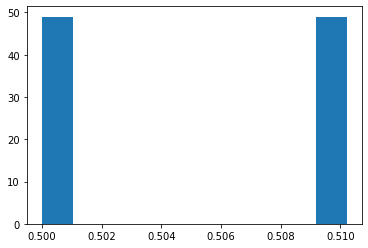

In [153]:
plt.hist(pscore)

In [154]:
p_gender ['pscore'] = pscore
p_gender.head()

,State,StateID,StratificationCategory,Prevalence_diff,Ozone_diff,PM2.5_diff,Ozone_treatment,Stratification_GENF,Stratification_GENM,propensity,pscore
0,Missouri,29,GENDER,0.5,-2.868604,-0.697126,0,1,0,0.497472,0.510204
1,Montana,30,GENDER,0.3,-2.010194,0.324339,0,1,0,0.509650,0.510204
2,Oklahoma,40,GENDER,0.1,-4.034150,-1.204948,0,0,1,-0.057231,0.500000
4,Maryland,24,GENDER,0.8,-1.651777,-0.672856,1,1,0,0.514735,0.510204
6,Kentucky,21,GENDER,1.2,-3.163654,-0.131591,0,1,0,0.493286,0.510204


In [155]:
y1 = p_gender[p_gender['Ozone_treatment'] == 1]['Prevalence_diff']
e1 = p_gender[p_gender['Ozone_treatment'] == 1]['pscore']
y0 = p_gender[p_gender['Ozone_treatment'] == 0]['Prevalence_diff']
e0 = p_gender[p_gender['Ozone_treatment'] == 0]['pscore']
n = len(y)

ipw_estimate = sum(y1/e1)/n - sum(y0/(1-e0))/n
ipw_estimate

-0.1760476190476177

## EDA

1) Asthma: Gender

Text(0.5, 1.0, 'Prevalence VS Gender')

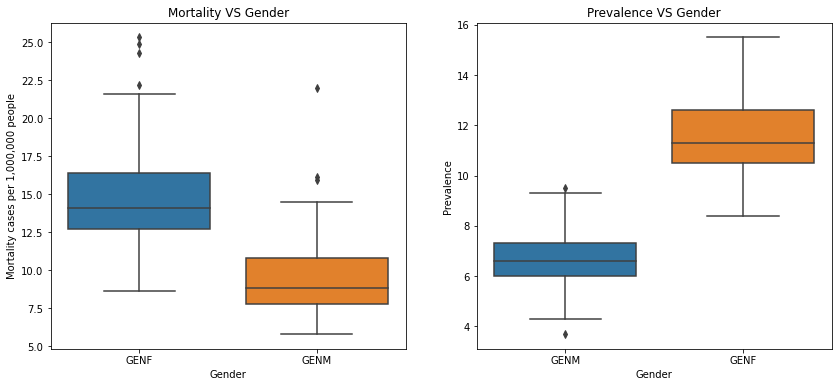

In [46]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
mortality_gender = mortality_final[mortality_final['StratificationCategory'] == 'GENDER']
sns.boxplot(x = 'Stratification', y = 'Cases_per_million', data = mortality_gender)
plt.xlabel('Gender')
plt.ylabel('Mortality cases per 1,000,000 people')
plt.title('Mortality VS Gender')

plt.subplot(1, 2, 2)
prevalence_gender = prevalence_final[prevalence_final['StratificationCategory'] == 'GENDER']
sns.boxplot(x = 'Stratification', y = 'Prevalence', data = prevalence_gender)
plt.xlabel('Gender')
plt.title('Prevalence VS Gender')

From boxplots generated between mortality and prevalence vs gender, We observed female having both higher mortality rate and prevalence for asthma. We suspect a correlation between gender and asthma prevalence where female are more susceptible to the disease.

Text(0.5, 1.0, 'Mortality rate for each year')

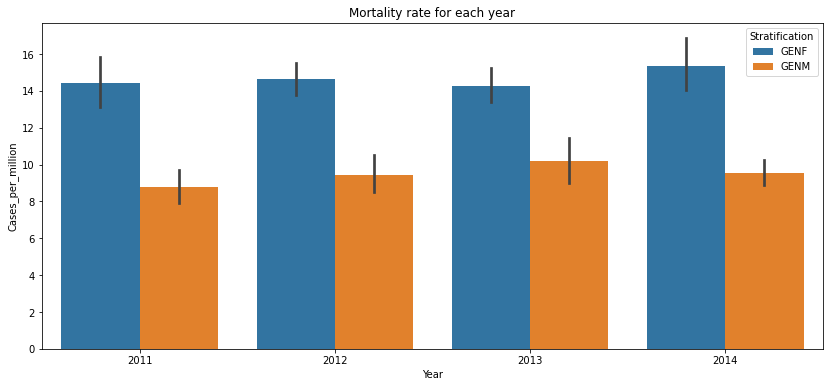

In [47]:
plt.figure(figsize = (14, 6))
sns.barplot(x = 'Year', y = 'Cases_per_million', hue = 'Stratification', data = mortality_gender)
plt.title('Mortality rate for each year')

In examining the influence of year on asthma motality rate, we don't see obvious difference of pattern with varying years hence it is safe reason that year has little or no confounding impact on gender's casual relationship with mortality rate.

Text(0.5, 1.0, 'Mortality rate for each year')

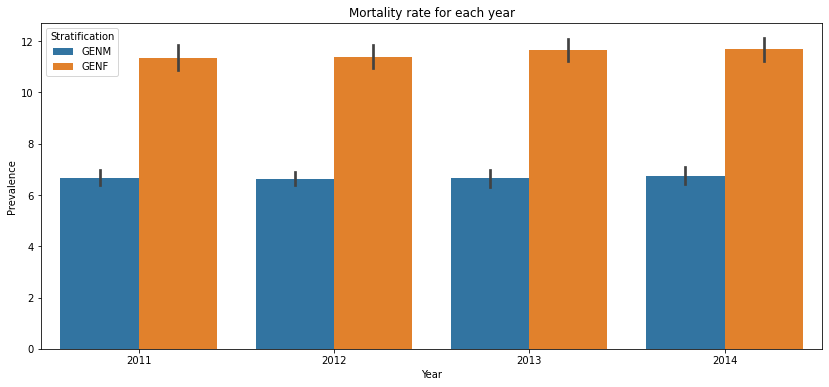

In [48]:
plt.figure(figsize = (14, 6))
prevalence_gender = prevalence_final[prevalence_final['StratificationCategory'] == 'GENDER']
sns.barplot(x = 'Year', y = 'Prevalence', hue = 'Stratification', data = prevalence_gender)
plt.title('Mortality rate for each year')

2) Asthma: Race

Text(0.5, 1.0, 'Prevalence VS Race')

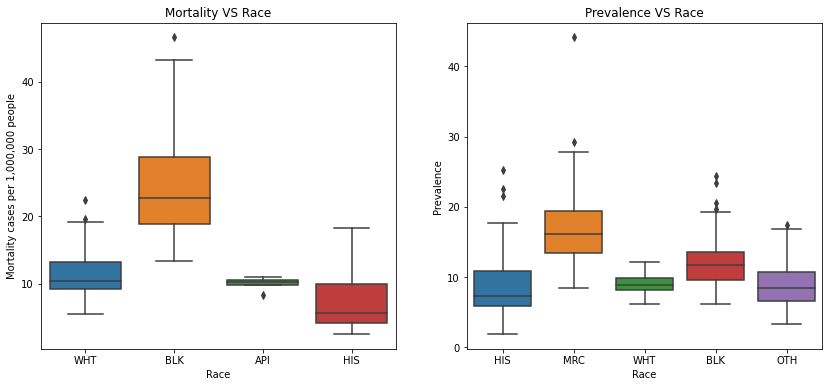

In [49]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
mortality_race = mortality_final[mortality_final['StratificationCategory'] == 'RACE']
sns.boxplot(x = 'Stratification', y = 'Cases_per_million', data = mortality_race)
plt.xlabel('Race')
plt.ylabel('Mortality cases per 1,000,000 people')
plt.title('Mortality VS Race')

plt.subplot(1, 2, 2)
prevalence_race = prevalence_final[prevalence_final['StratificationCategory'] == 'RACE']
sns.boxplot(x = 'Stratification', y = 'Prevalence', data = prevalence_race)
plt.xlabel('Race')
plt.title('Prevalence VS Race')

When examining the boxplot between race and mortality rate, we see black (BLK) having the highest upperbound as well as outlier values. Black (BLK) has the smallest interquantile range while asian and pacific islanders (API) have the largest.\
When examining the boxplot between prevalance and race, we see multiracial (MRC) having the highest upperbound and outlier.\
One thing to note is that gender and race has no data reflecting their potential relationship hence when modeling, we either separate them or choose one.

3) Asthma: location/state

<AxesSubplot:xlabel='StateID', ylabel='Prevalence'>

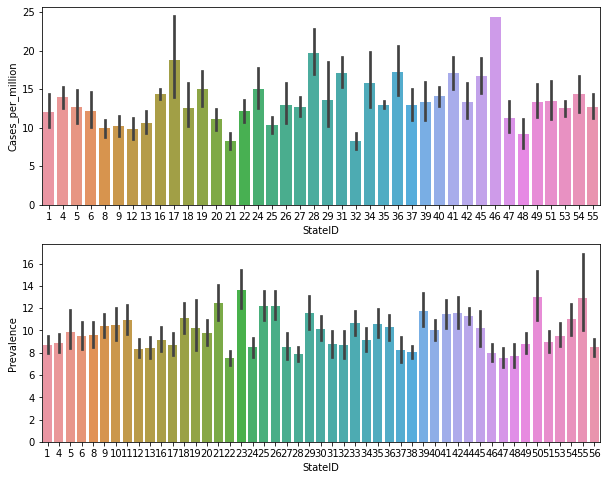

In [50]:
### Add into abbreviations
plt.figure(figsize = (10, 8))

plt.subplot(2, 1, 1)
sns.barplot(x = 'StateID', y = 'Cases_per_million', data = mortality_final)

plt.subplot(2, 1, 2)
sns.barplot(x = 'StateID', y = 'Prevalence', data = prevalence_final)

We see varying mortality/prevalence of asthma across states, thus we want to include state as a confounding variable when predicting future pm2.5/ozone level on asthma prevalence/mortality.

In [51]:
new = prevalence_race.groupby(['State','Stratification']).size().to_frame().reset_index().pivot(index='State', columns='Stratification', values=0).fillna(0)

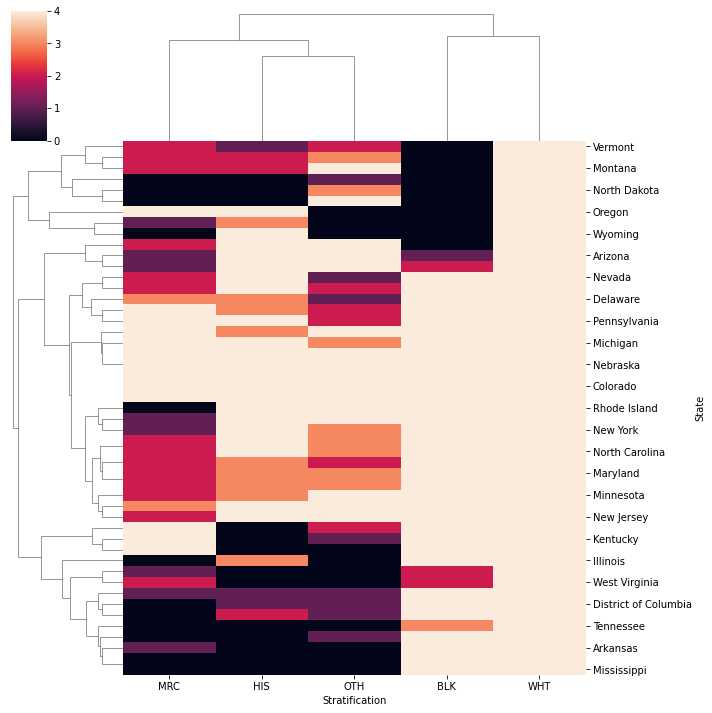

In [52]:
sns.clustermap(new)

From the clustered heatmap above, we see unequal distribution of race along different states. Thus, we are interested in examining the relationship between race and geography, which may both serve as a confounding variable to asthma prevalence/mortality.

4) PM2.5 and ozone

<AxesSubplot:xlabel='PM2.5', ylabel='Ozone'>

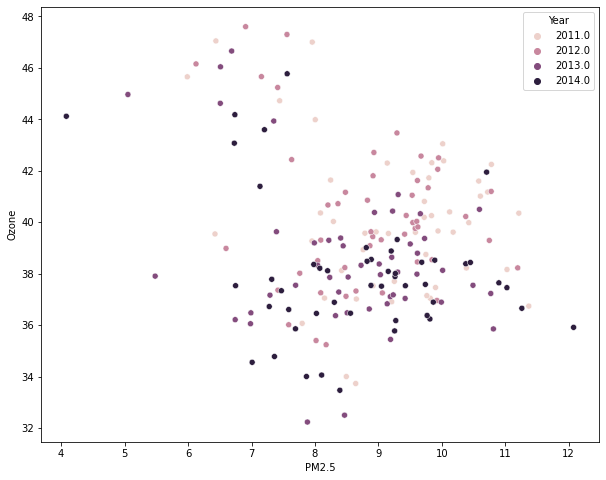

In [53]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='PM2.5', y='Ozone', data=pm25_ozone, hue='Year')

When examining the scatterplot between Ozone and pm2.5 level, we see no distinct relationship as shown by the ramdomized pattern. Thus, when evaluating their effects on prevalence of asthma, it is reasonable that we separate them into distinct random variables.

5) Asthma, PM2.5 and ozone

Text(0.5, 1.0, 'Prevalence VS Ozone level')

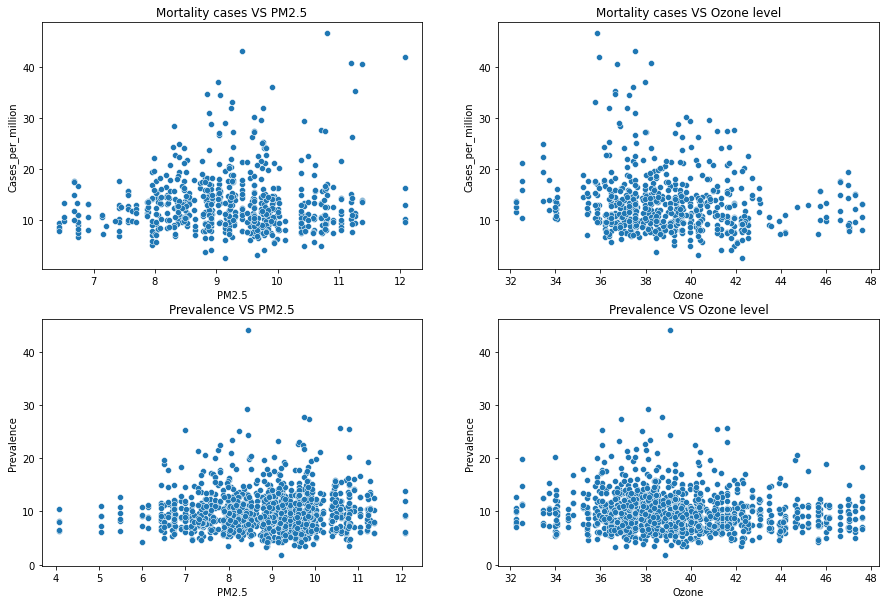

In [54]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='PM2.5', y='Cases_per_million', data=mortality_final)
plt.title('Mortality cases VS PM2.5')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Ozone', y='Cases_per_million', data=mortality_final)
plt.title('Mortality cases VS Ozone level')

plt.subplot(2, 2, 3)
sns.scatterplot(x='PM2.5', y='Prevalence', data=prevalence_final)
plt.title('Prevalence VS PM2.5')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Ozone', y='Prevalence', data=prevalence_final)
plt.title('Prevalence VS Ozone level')

When examining the scatter plot above, we don't see clear pattern between prevalence of asthma/mortality rate versus onzone/pm2.5. However, there may exist various confounding variables that influence the overall trend, for example location(state), year, as well as gender and race.

In [55]:
prevalence_gender

,Year,State,StateID,Prevalence,StratificationCategory,Stratification,PM2.5,Ozone
0,2012,Colorado,8,7.1,GENDER,GENM,6.906790,47.597103
2,2014,New Mexico,35,7.4,GENDER,GENM,6.728881,43.070311
3,2011,Missouri,29,11.5,GENDER,GENF,10.122351,40.398751
4,2011,Montana,30,11.6,GENDER,GENF,6.424145,39.542425
5,2012,Kentucky,21,8.4,GENDER,GENM,9.935710,42.056297
...,...,...,...,...,...,...,...,...
1330,2012,Oklahoma,40,12.7,GENDER,GENF,8.929216,42.708452
1336,2013,Ohio,39,6.8,GENDER,GENM,10.490872,37.547077
1339,2013,Kansas,20,10.9,GENDER,GENF,8.937908,40.379074
1342,2011,New York,36,12.3,GENDER,GENF,9.900638,37.461733


<AxesSubplot:xlabel='PM2.5', ylabel='Prevalence'>

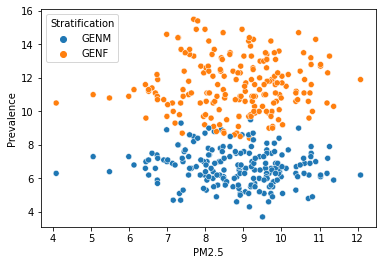

In [56]:
sns.scatterplot(data=prevalence_gender, x = 'PM2.5', y = 'Prevalence', hue='Stratification')

<AxesSubplot:xlabel='Ozone', ylabel='Prevalence'>

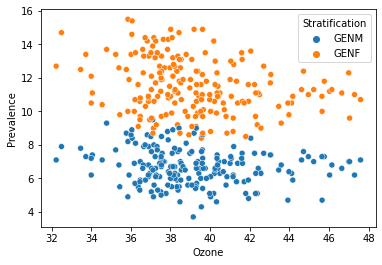

In [57]:
sns.scatterplot(data=prevalence_gender, x = 'Ozone', y = 'Prevalence', hue='Stratification')

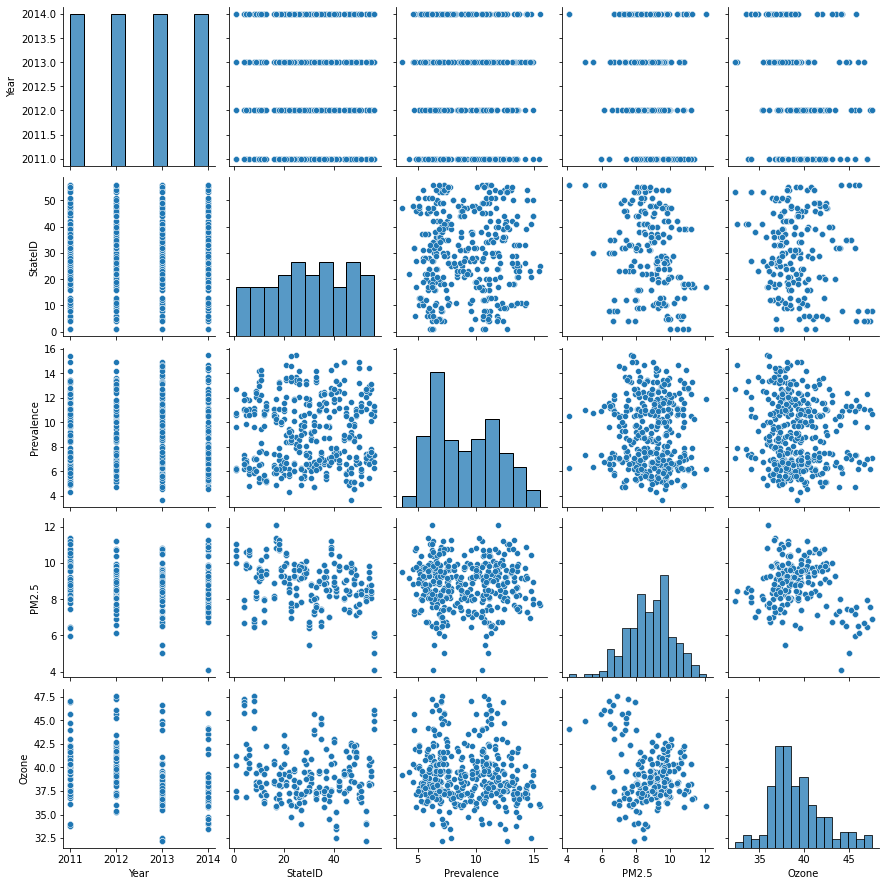

In [58]:
sns.pairplot(prevalence_gender)

## Research Question 1: What's the causal impact of PM2.5 and ozone level on asthma prevalence? (use race/gender as the control variables)

(Due to the limitation of the asthma data set, we can't control for race and gender at the same time for our model, so we will control for race and gender seperately in our analysis)

### Model Setup
- Treatment variable Z: PM2.5/Ozone 
- Outcome variable Y: Prevalence/Mortality Rate of Asthma
- Confounders: gender/race \
The unconfoundedness doesn't hold because this is an observational study but not a randomized experiment.\


### Here are some methods we would use in this section.

In [59]:
### This finction below is adapted from Lab7
def fit_OLS_model(df, target_variable, explanatory_variables, intercept = False):
    """
    Fits an OLS model from data.
    
    Inputs:
        df: pandas DataFrame
        target_variable: string, name of the target variable
        explanatory_variables: list of strings, names of the explanatory variables
        intercept: bool, if True add intercept term
    Outputs:
        fitted_model: model containing OLS regression results
    """
    
    target = df[target_variable]
    inputs = df[explanatory_variables]
    if intercept:
        inputs = sm.add_constant(inputs)
    
    fitted_model = sm.OLS(target, inputs).fit()
    return(fitted_model)

In [60]:
def encode_and_bind(original_dataframe, feature_to_encode):
    """
    One-hot encoding for deature
    """
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

### 1) PM2.5 and prevalence

First, let's look at the relationship between prevalence and PM2.5 directly.

In [61]:
model_prevalence_pm = fit_OLS_model(prevalence_final, 'Prevalence', 'PM2.5', intercept = True)
print(model_prevalence_pm.summary())

                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.202
Date:                Wed, 01 Dec 2021   Prob (F-statistic):              0.273
Time:                        10:31:49   Log-Likelihood:                -3392.2
No. Observations:                1252   AIC:                             6788.
Df Residuals:                    1250   BIC:                             6799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1458      0.720     12.695      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



This is not a good model since its log-likelihood is far from 0 and its coefficient on PM2.5 is not statistically significant. 

From previous EDA part, we know that ...
- "When examining the boxplot between prevalance and race, we see multiracial (MRC) having the highest upperbound and outlier."
- "We see varying mortality/prevalence of asthma across states." 
 
Thus, we draw a directed acyclic graph (DAG) to capture the casual relationship between variables.

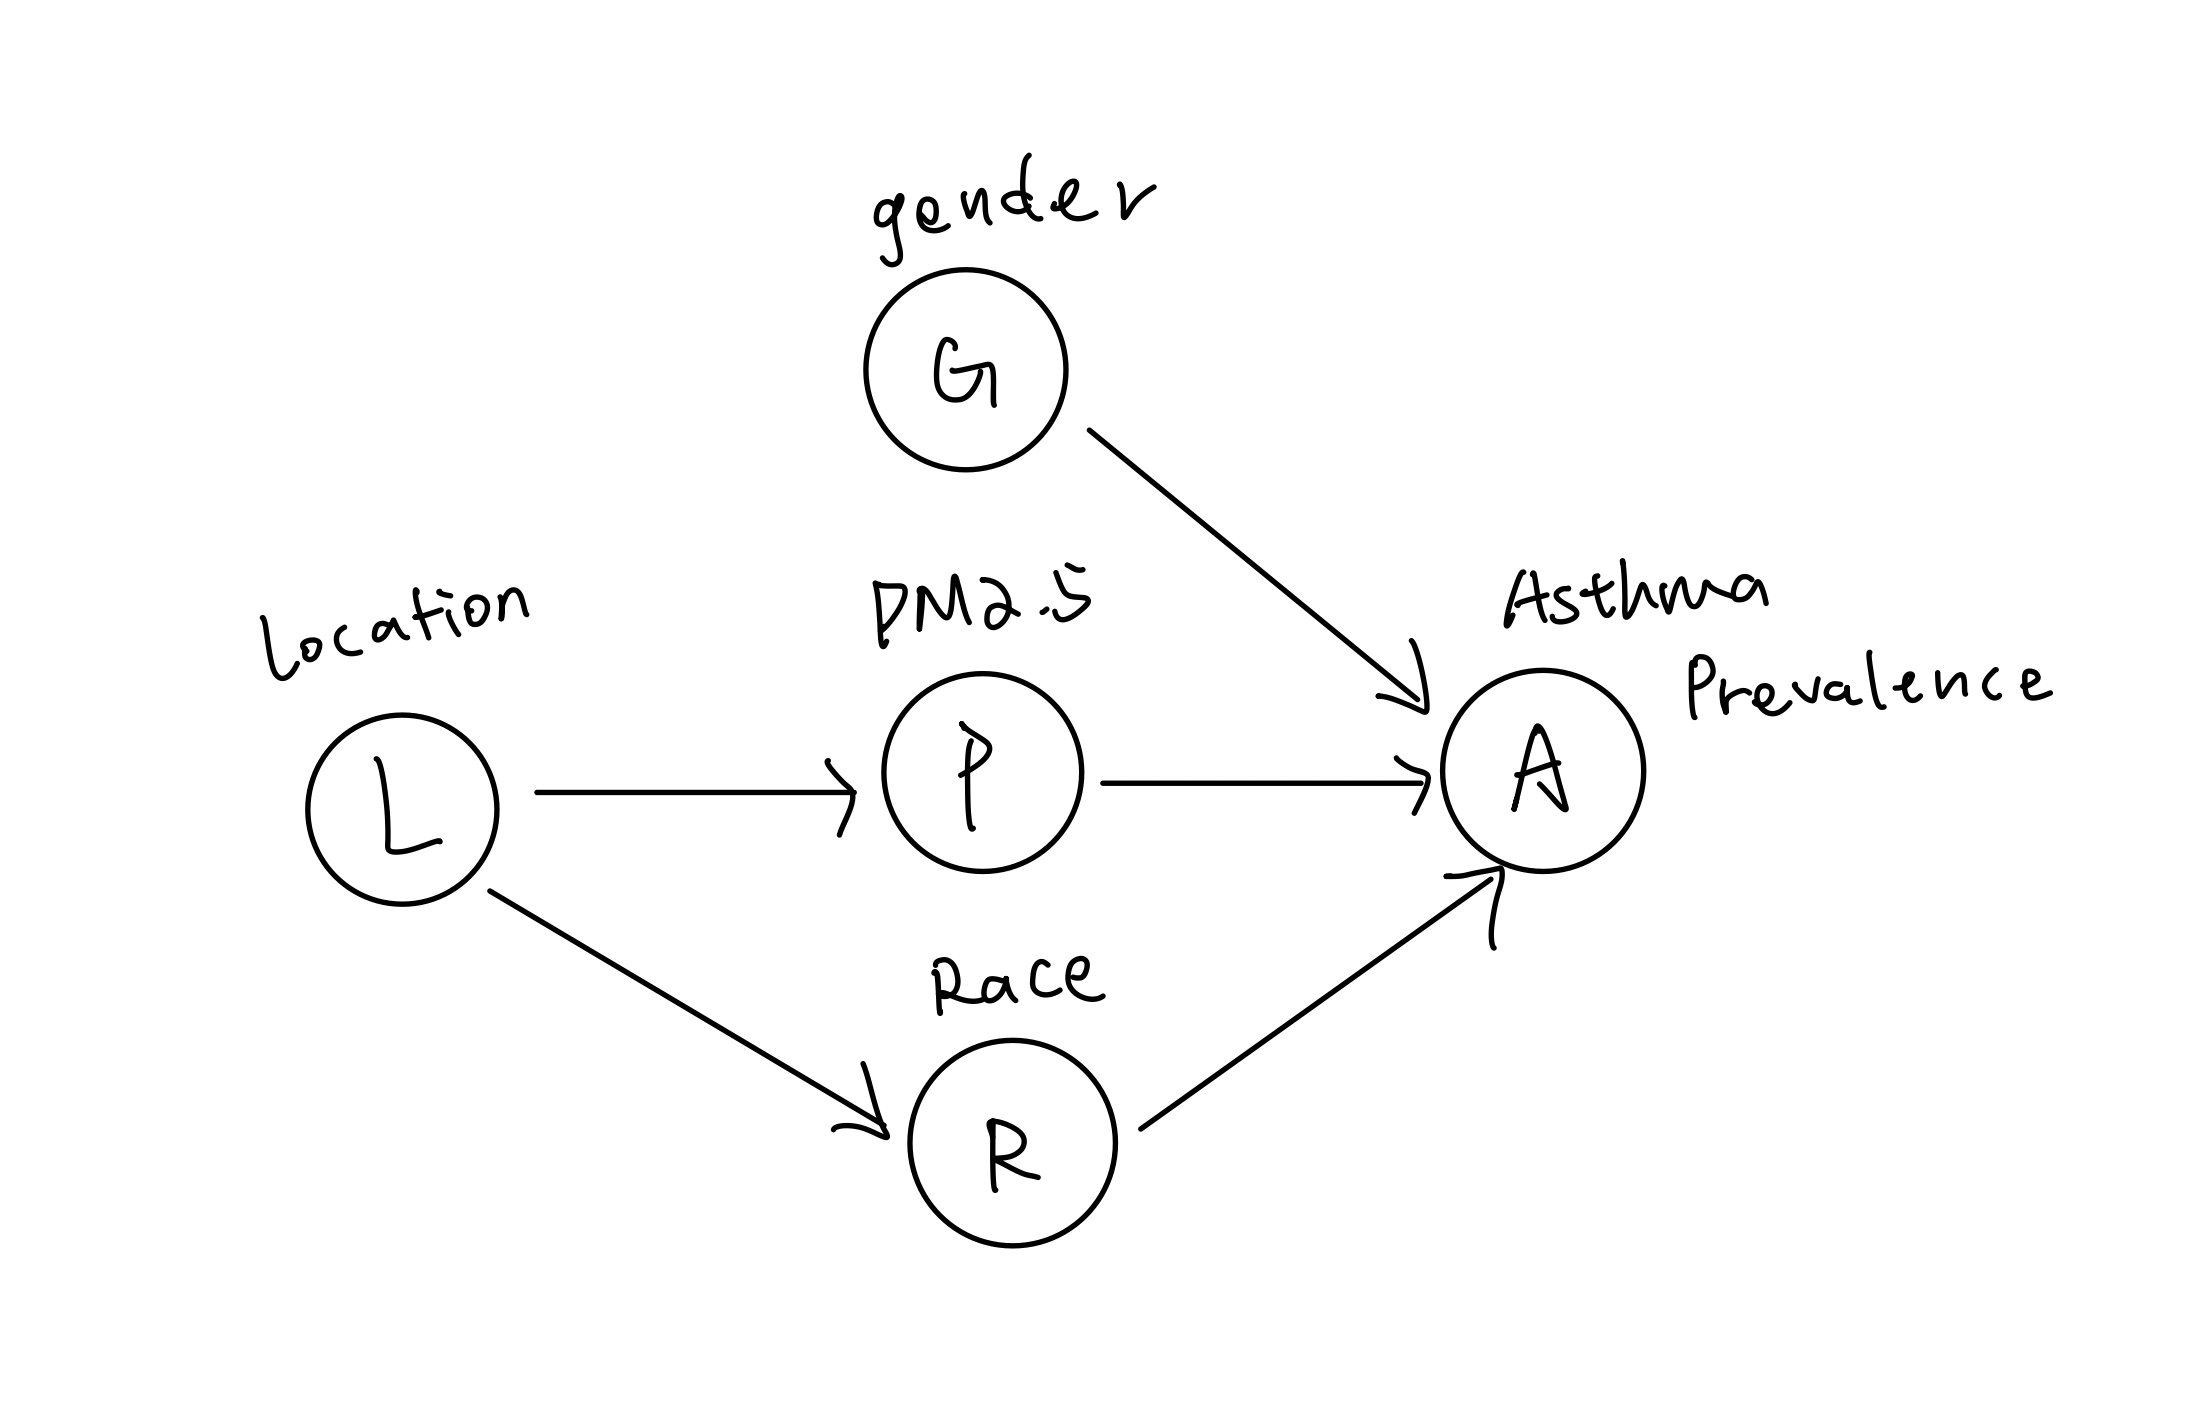

Here we see that both race and gender act as confounding variables for asthma prevalence. We want to control for both. Thus, we examine the effect of PM2.5 on asthma prevalence by controlling for either race or gender.

In [62]:
# One-hot encoding for race
prevalence_race_onehot = encode_and_bind(prevalence_race, 'Stratification')
prevalence_race_onehot = prevalence_race_onehot.rename(columns={'Stratification_BLK':'BLK','Stratification_HIS':'HIS',
                                                'Stratification_MRC':'MRC', 'Stratification_OTH':'OTH',
                                                'Stratification_WHT':'WHT'})
prevalence_race_onehot.head(5)

,Year,State,StateID,Prevalence,StratificationCategory,PM2.5,Ozone,BLK,HIS,MRC,OTH,WHT
19,2011,Arizona,4,6.9,RACE,7.957158,46.998399,0,1,0,0,0
20,2012,Colorado,8,12.0,RACE,6.906790,47.597103,0,0,1,0,0
22,2011,Colorado,8,6.6,RACE,6.438329,47.043940,0,1,0,0,0
23,2014,Arkansas,5,8.7,RACE,9.865337,36.892805,0,0,0,0,1
29,2013,California,6,12.0,RACE,10.592506,40.498894,1,0,0,0,0


In [63]:
# One-hot encoding for gender
prevalence_gender_onehot = encode_and_bind(prevalence_gender, 'Stratification')
prevalence_gender_onehot = prevalence_gender_onehot.rename(columns={'Stratification_GENF':'Female','Stratification_GENM':'Male'})
prevalence_race_onehot.head(5)

,Year,State,StateID,Prevalence,StratificationCategory,PM2.5,Ozone,BLK,HIS,MRC,OTH,WHT
19,2011,Arizona,4,6.9,RACE,7.957158,46.998399,0,1,0,0,0
20,2012,Colorado,8,12.0,RACE,6.906790,47.597103,0,0,1,0,0
22,2011,Colorado,8,6.6,RACE,6.438329,47.043940,0,1,0,0,0
23,2014,Arkansas,5,8.7,RACE,9.865337,36.892805,0,0,0,0,1
29,2013,California,6,12.0,RACE,10.592506,40.498894,1,0,0,0,0


In [64]:
# One-hot encoding for state
prevalence_race_onehot2 = encode_and_bind(prevalence_race_onehot, 'State')
prevalence_race_onehot2.head(5) 

,Year,StateID,Prevalence,StratificationCategory,PM2.5,Ozone,BLK,HIS,MRC,OTH,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
19,2011,4,6.9,RACE,7.957158,46.998399,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20,2012,8,12.0,RACE,6.906790,47.597103,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
22,2011,8,6.6,RACE,6.438329,47.043940,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23,2014,5,8.7,RACE,9.865337,36.892805,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,2013,6,12.0,RACE,10.592506,40.498894,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since we have panel data, we want to omit variable BLK, Male, and State_Alabama to prevent perfect multicollinearity

In [65]:
# Omitting BLK variable (for panel data)
model_prevalence_pm_race = fit_OLS_model(prevalence_race_onehot, 'Prevalence', ['PM2.5','HIS', 'MRC', 'OTH', 'WHT'], intercept = True)
print(model_prevalence_pm_race.summary())

                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     103.1
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.95e-80
Time:                        10:31:49   Log-Likelihood:                -1724.4
No. Observations:                 664   AIC:                             3461.
Df Residuals:                     658   BIC:                             3488.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1053      0.984     12.301      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



We see the model has a log-likelihood closer to 0. However, when observing the coefficient for PM2.5, we see it having a p-value of 0.788 which is not significant. Thus, we fit the model further to location to see if this changes the case.

In [66]:
# Omitting State_Alabama and BLK (for panel data)
model_prevalence_pm_race_state = fit_OLS_model(prevalence_race_onehot2, 'Prevalence', ['PM2.5', 'HIS', 'MRC', 'OTH', 'WHT','State_Arizona',
       'State_Arkansas', 'State_California', 'State_Colorado',
       'State_Connecticut', 'State_Delaware', 'State_District of Columbia',
       'State_Florida', 'State_Georgia', 'State_Idaho', 'State_Illinois',
       'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky',
       'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_North Carolina', 'State_North Dakota', 'State_Ohio',
       'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Rhode Island', 'State_South Carolina', 'State_South Dakota',
       'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Vermont',
       'State_Virginia', 'State_Washington', 'State_West Virginia',
       'State_Wisconsin', 'State_Wyoming'], intercept = True)
print(model_prevalence_pm_race_state.summary())

                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     18.80
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.45e-96
Time:                        10:31:49   Log-Likelihood:                -1595.0
No. Observations:                 664   AIC:                             3298.
Df Residuals:                     610   BIC:                             3541.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



This model has a log-likelihood more closer to 0. However, the p-value for PM2.5 is sill insignificant. Let's try looking at the data year by year and see if that makes anything different.

In [67]:
prevalence_race_onehot2_2011 = prevalence_race_onehot2[prevalence_race_onehot2['Year'] == 2011]
prevalence_race_onehot2_2011.head(5)

,Year,StateID,Prevalence,StratificationCategory,PM2.5,Ozone,BLK,HIS,MRC,OTH,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
19,2011,4,6.9,RACE,7.957158,46.998399,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22,2011,8,6.6,RACE,6.438329,47.043940,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
31,2011,9,9.2,RACE,9.250752,37.700337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,2011,6,9.6,RACE,10.424960,39.981360,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,2011,6,6.2,RACE,10.424960,39.981360,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# Omitting State_Alabama and BLK (for panel data) and use 2011 data only
model_prevalence_pm_race_state_2011 = fit_OLS_model(prevalence_race_onehot2_2011, 'Prevalence', ['PM2.5', 'HIS', 'MRC', 'OTH', 'WHT', 'State_Arizona',
       'State_Arkansas', 'State_California', 'State_Colorado',
       'State_Connecticut', 'State_Delaware', 'State_District of Columbia',
       'State_Florida', 'State_Georgia', 'State_Idaho', 'State_Illinois',
       'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky',
       'State_Louisiana', 'State_Maine', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Montana',
       'State_Nebraska', 'State_Nevada', 'State_New Hampshire',
       'State_New Jersey', 'State_New Mexico', 'State_New York',
       'State_North Carolina', 'State_North Dakota', 'State_Ohio',
       'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_Rhode Island', 'State_South Carolina', 'State_South Dakota',
       'State_Tennessee', 'State_Texas', 'State_Utah', 'State_Vermont',
       'State_Virginia', 'State_Washington', 'State_West Virginia',
       'State_Wisconsin', 'State_Wyoming'], intercept = True)
print(model_prevalence_pm_race_state_2011.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     6.188
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.90e-16
Time:                        10:31:49   Log-Likelihood:                -375.99
No. Observations:                 167   AIC:                             858.0
Df Residuals:                     114   BIC:                             1023.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

With a log-likelihood much closer to 0, we still see PM2.5 having no significant effect on asthma prevalence. We now look at the casual effect of PM2.5 on asthma controlling for gender.

In [69]:
prevalence_gender_onehot.head()

,Year,State,StateID,Prevalence,StratificationCategory,PM2.5,Ozone,Female,Male
0,2012,Colorado,8,7.1,GENDER,6.906790,47.597103,0,1
2,2014,New Mexico,35,7.4,GENDER,6.728881,43.070311,0,1
3,2011,Missouri,29,11.5,GENDER,10.122351,40.398751,1,0
4,2011,Montana,30,11.6,GENDER,6.424145,39.542425,1,0
5,2012,Kentucky,21,8.4,GENDER,9.935710,42.056297,0,1


In [70]:
# Adding the interaction term
prevalence_gender_onehot['multi_PM2.5'] = prevalence_gender_onehot['Female'] * prevalence_gender_onehot['PM2.5']
prevalence_gender_onehot['multi_ozone'] = prevalence_gender_onehot['Female'] * prevalence_gender_onehot['Ozone']

In [71]:
model_prevalence_pm_gender = fit_OLS_model(prevalence_gender_onehot, 'Prevalence', ['Ozone', 'PM2.5', 'Female'], intercept = True)
print(model_prevalence_pm_gender.summary())

                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     431.6
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          3.39e-123
Time:                        10:31:49   Log-Likelihood:                -669.50
No. Observations:                 392   AIC:                             1347.
Df Residuals:                     388   BIC:                             1363.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4848      1.130     10.162      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



**Quick Summary:** There is no causal relationship between PM2.5 and prevalence of asthma.

### 2) Ozone level and prevalence

First, let's look at the relationship between prevalence and ozone level directly.

In [72]:
model_prevalence_ozone = fit_OLS_model(prevalence_final, 'Prevalence', 'Ozone', intercept = True)
print(model_prevalence_ozone.summary())

                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.28
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           0.000809
Time:                        10:31:49   Log-Likelihood:                -3387.2
No. Observations:                1252   AIC:                             6778.
Df Residuals:                    1250   BIC:                             6789.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.4428      1.349     10.710      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



The coefficient for ozone in this OLS model is statistically significant but the log-likelihood is still largely deviated from 0.

Similarly, we try to fit a OLS model that include race/gender as the confounding variable for Ozone level.

In [73]:
# Omitting BLK variable (for panel data)
model_prevalence_ozone_race = fit_OLS_model(prevalence_race_onehot, 'Prevalence', ['Ozone','HIS', 'MRC', 'OTH', 'WHT'], intercept = True)
print(model_prevalence_ozone_race.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     105.2
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.58e-81
Time:                        10:31:49   Log-Likelihood:                -1721.4
No. Observations:                 664   AIC:                             3455.
Df Residuals:                     658   BIC:                             3482.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.8402      1.653      9.586      0.0

In [74]:
model_prevalence_ozone_gender = fit_OLS_model(prevalence_gender_onehot, 'Prevalence', ['Ozone', 'Female'], intercept = True)
print(model_prevalence_ozone_gender.summary())

                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     644.1
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          3.69e-124
Time:                        10:31:49   Log-Likelihood:                -670.65
No. Observations:                 392   AIC:                             1347.
Df Residuals:                     389   BIC:                             1359.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4710      0.911     11.491      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



The coefficient for Ozone now is statistically significant and there's causal relationship between ozone and prevalence for asthma.

However, when we include state (location) in the OLS model, the coefficient is no longer statistically significant and the model's performance drops back. This might be caused by the fact that state is not a good control variable.

**Quick Summary:** There is causal relationship between ozone level and prevalence of asthma if we controlled for either race or gender.

### 3) PM2.5 and Mortality Rate

Similarly, we can see whether there's causal relationship between PM2.5 and Mortality Rate.

And we still need to apply one-hot encoding here. 

In [75]:
# One-hot encoding for race
mortality_race_onehot = encode_and_bind(mortality_race, 'Stratification')
mortality_race_onehot = mortality_race_onehot.rename(columns={'Stratification_BLK':'BLK','Stratification_HIS':'HIS',
                                                'Stratification_MRC':'MRC', 'Stratification_OTH':'OTH',
                                                'Stratification_WHT':'WHT','Stratification_API':'API'})
mortality_race_onehot.head(5)

,Year,State,StateID,Cases_per_million,StratificationCategory,PM2.5,Ozone,API,BLK,HIS,WHT
0,2013,Florida,12,9.0,RACE,6.742281,36.211734,0,0,0,1
4,2011,Colorado,8,9.4,RACE,6.438329,47.043940,0,0,0,1
6,2014,Indiana,18,35.2,RACE,11.261254,36.653973,0,1,0,0
10,2011,Iowa,19,14.7,RACE,9.748446,38.745307,0,0,0,1
14,2012,California,6,8.3,RACE,9.784228,41.335745,1,0,0,0


In [76]:
# One-hot encoding for gender
mortality_gender_onehot = encode_and_bind(mortality_gender, 'Stratification')
mortality_gender_onehot = mortality_gender_onehot.rename(columns={'Stratification_GENF':'Female','Stratification_GENM':'Male'})
mortality_gender_onehot.head(5)

,Year,State,StateID,Cases_per_million,StratificationCategory,PM2.5,Ozone,Female,Male
1,2013,Illinois,17,17.1,GENDER,10.812928,35.851500,1,0
5,2013,Iowa,19,14.8,GENDER,9.303900,38.061452,1,0
8,2013,California,6,8.0,GENDER,10.592506,40.498894,0,1
9,2012,Georgia,13,11.0,GENDER,9.542369,39.983749,1,0
12,2014,Georgia,13,7.7,GENDER,10.377228,38.383701,0,1


In [77]:
# One-hot encoding for state
mortality_race_onehot2 = encode_and_bind(mortality_race_onehot, 'State')
mortality_race_onehot2.head(5)

,Year,StateID,Cases_per_million,StratificationCategory,PM2.5,Ozone,API,BLK,HIS,WHT,...,State_Oregon,State_Pennsylvania,State_South Carolina,State_Tennessee,State_Texas,State_Utah,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin
0,2013,12,9.0,RACE,6.742281,36.211734,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2011,8,9.4,RACE,6.438329,47.043940,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2014,18,35.2,RACE,11.261254,36.653973,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2011,19,14.7,RACE,9.748446,38.745307,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14,2012,6,8.3,RACE,9.784228,41.335745,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Omitting BLK variable (for panel data)
model_mortality_pm_race = fit_OLS_model(mortality_race_onehot2, 'Cases_per_million', ['PM2.5', 'HIS', 'WHT','API'], intercept = True)
print(model_mortality_pm_race.summary())

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



                            OLS Regression Results                            
Dep. Variable:      Cases_per_million   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     93.69
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           6.31e-47
Time:                        10:31:49   Log-Likelihood:                -705.43
No. Observations:                 232   AIC:                             1421.
Df Residuals:                     227   BIC:                             1438.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3955      3.112      7.518      0.0

Surprisingly, this time, the coefficient for PM2.5 is statistically significant, indicating that there's causual relationship between PM2.5 and mortality rate.

In [79]:
# Omitting State_Alabama and BLK (for panel data)
model_mortality_pm_race_state = fit_OLS_model(mortality_race_onehot2, 'Cases_per_million', ['PM2.5', 'HIS', 'WHT', 'API', 'State_Arizona', 'State_Arkansas', 'State_California',
       'State_Colorado', 'State_Connecticut', 'State_Florida', 'State_Georgia',
       'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa',
       'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maryland',
       'State_Massachusetts', 'State_Michigan', 'State_Minnesota',
       'State_Mississippi', 'State_Missouri', 'State_Nebraska',
       'State_New Jersey', 'State_New York', 'State_North Carolina',
       'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania',
       'State_South Carolina', 'State_Tennessee', 'State_Texas', 'State_Utah',
       'State_Virginia', 'State_Washington', 'State_West Virginia',
       'State_Wisconsin'], intercept = True)
print(model_mortality_pm_race_state.summary())

                            OLS Regression Results                            
Dep. Variable:      Cases_per_million   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     20.63
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.06e-50
Time:                        10:31:50   Log-Likelihood:                -624.60
No. Observations:                 232   AIC:                             1331.
Df Residuals:                     191   BIC:                             1473.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   25.8928 

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [80]:
#Adding interaction term between gender&PM2.5 and gender&ozone
mortality_gender_onehot['multi_PM2.5'] = mortality_gender_onehot['Female'] * mortality_gender_onehot['PM2.5']
mortality_gender_onehot['multi_ozone'] = mortality_gender_onehot['Female'] * mortality_gender_onehot['Ozone']

In [81]:
model_mortality_pm_gender = fit_OLS_model(mortality_gender_onehot, 'Cases_per_million', ['PM2.5', 'Female'], intercept = True)
print(model_prevalence_pm_gender.summary())

                            OLS Regression Results                            
Dep. Variable:             Prevalence   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     431.6
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          3.39e-123
Time:                        10:31:50   Log-Likelihood:                -669.50
No. Observations:                 392   AIC:                             1347.
Df Residuals:                     388   BIC:                             1363.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4848      1.130     10.162      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



However, when we add state (location) to perform OLS, performance of the model drops back. We attribute this phenomenon to the reason that state is not a good control variable.

**Quick Summary:** There is no causal relationship between PM2.5 and mortality rate of asthma.

### 4) Ozone level and Mortality Rate

Similarly, we can see whether there's causal relationship between Ozone level and Mortality Rate.

In [82]:
# Omitting BLK variable (for panel data)
model_mortality_ozone_race = fit_OLS_model(mortality_race_onehot2, 'Cases_per_million', ['Ozone', 'HIS', 'WHT','API'], intercept = True)
print(model_mortality_ozone_race.summary())

                            OLS Regression Results                            
Dep. Variable:      Cases_per_million   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     96.28
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           9.20e-48
Time:                        10:31:50   Log-Likelihood:                -703.45
No. Observations:                 232   AIC:                             1417.
Df Residuals:                     227   BIC:                             1434.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.7041      5.025      6.906      0.0

In [83]:
model_mortality_ozone_gender = fit_OLS_model(mortality_gender_onehot, 'Cases_per_million', ['Ozone', 'Female'], intercept = True)
print(model_mortality_ozone_gender.summary())

                            OLS Regression Results                            
Dep. Variable:      Cases_per_million   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     84.08
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           5.75e-28
Time:                        10:31:50   Log-Likelihood:                -572.97
No. Observations:                 227   AIC:                             1152.
Df Residuals:                     224   BIC:                             1162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8579      2.682      6.286      0.0

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



**Quick Summary:** There's causal relationship between ozone level and mortality rate of Asthma once we controlled for race/gender.

## Conclusion for Research Question 1: 

1. There is no causal relationship between PM2.5 and prevalence of asthma. 
2. There is causal relationship between Ozone level and prevalence of asthma once we controlled for race/gender.
3. There is causal relationship between PM2.5 and mortality rate of asthma once we controlled for gender.
4. There is causal relationship between Ozone level and mortality rate of asthma once we controlled for race/gender.

**Thus, when we start to look at Research Question 2, we don't need to include PM2.5 in our prediction model for prevalence of Asthma or include ozone in our prediction model for mortality rate of Asthma. We would try both predictions models and choose the one with best performance in the next part.**

## Discussion

1. There may be other confounders such as age/health condition/smoking that may affect the prevalence/mortality rate of asthma. However, we don't have these data and therefore can't control for them in our model.

## Research Question 2: Given the selected features, build a model that can predict the prevalence/mortality rate of Asthma.